# Preparar Datos

## Importar Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

Los datos principales utilizados para el análisis de portafolios de media-varianza son estimaciones del retorno y el riesgo de los activos involucrados. Suponiendo que los retornos en exceso de los activos se distribuyen de manera normal, necesitamos estimar los parámetros de la distribución subyacente.

Usaremos los datos de RiskAmerica

In [3]:
df_ts = pd.read_excel('IndicesHistoricosValor.xlsx')
df_ts['Fecha'] = pd.to_datetime(df_ts['Fecha'])
df_ts = df_ts.sort_values(by='Fecha', ascending=True)
df_ts.set_index('Fecha', inplace=True)
df_ts.head()

/opt/homebrew/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,ALMENDRAL Cierre Ix,BCI Cierre Ix,CCU Cierre Ix,CMPC Cierre Ix,EISA Cierre Ix,IANSA Cierre Ix,MALLPLAZA Cierre Ix,MULTIFOODS Cierre Ix,SOCOVESA Cierre Ix,ZOFRI Cierre Ix
Fecha,,,,,,,,,,
2019-10-23,1111.2083,18249.3552,4003.6900,4086.3260,1181.7295,303.3098,1318.7629,1219.7996,1695.6321,30920.5787
2019-10-24,1111.2083,18759.0586,4100.5113,4226.6872,1181.7295,303.3098,1290.7942,1219.6943,1695.6321,30920.5787
2019-10-25,1090.1002,18594.5055,3961.8214,4135.0274,1142.2054,303.3098,1277.3835,1207.4096,1670.2112,30920.5787
2019-10-28,1090.1002,18701.4650,3877.5607,4203.9446,1146.0393,303.3098,1266.4112,1207.4096,1646.8092,30920.5787
2019-10-29,1090.1002,18055.5939,3846.6826,4132.7302,1146.0393,303.3098,1217.7168,1198.6348,1628.9595,30920.5787


In [4]:
# Obtener el primer día hábil de cada mes
df_ts = df_ts.resample('BMS').first()

# Mostrar los primeros resultados
df_ts.head()

,ALMENDRAL Cierre Ix,BCI Cierre Ix,CCU Cierre Ix,CMPC Cierre Ix,EISA Cierre Ix,IANSA Cierre Ix,MALLPLAZA Cierre Ix,MULTIFOODS Cierre Ix,SOCOVESA Cierre Ix,ZOFRI Cierre Ix
Fecha,,,,,,,,,,
2019-10-01,1111.2083,18249.3552,4003.6900,4086.3260,1181.7295,303.3098,1318.7629,1219.7996,1695.6321,30920.5787
2019-11-01,1056.3758,17071.9775,3857.1497,4019.9358,1067.1493,303.3098,1142.4163,1148.9345,1560.1302,30277.0841
2019-12-02,909.8321,14542.3842,3887.5045,3955.8429,880.9515,272.9788,1064.8926,1183.2965,1147.4758,27292.0195
2020-01-01,1031.1431,14521.8151,3878.2183,4399.2097,955.2172,272.9788,1140.2649,1214.2891,1170.0977,26394.3679
2020-02-03,1042.0611,14062.7118,3754.0730,4215.4307,988.1012,272.9788,1004.7240,1232.3300,1078.3253,25586.2682


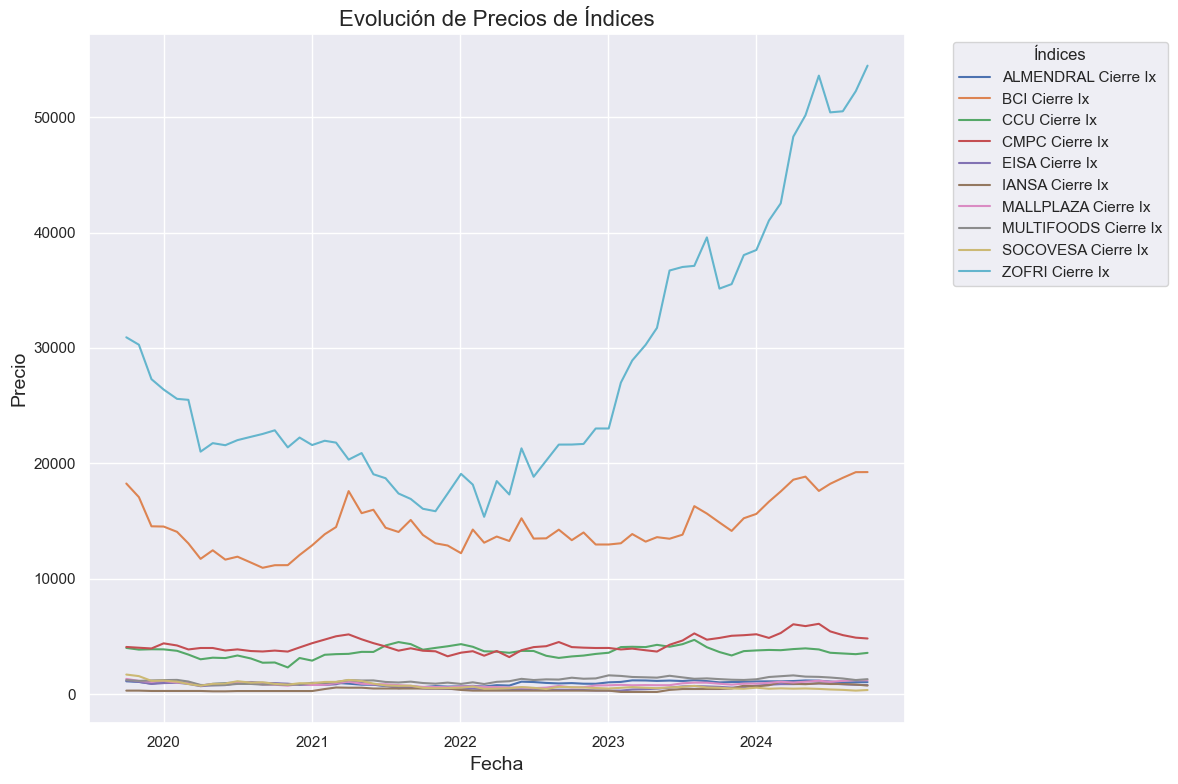

In [5]:
# Graficar la evolución de precios para todos los índices
plt.figure(figsize=(12, 8))

# Graficar todas las columnas (activos)
for column in df_ts.columns:
    plt.plot(df_ts.index, df_ts[column], label=column)

# Añadir título y etiquetas
plt.title('Evolución de Precios de Índices', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.grid(True)
plt.legend(title='Índices', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

A continuación, convertimos los precios de cierre absolutos en cambios relativos ("rendimientos excedentes"), en unidades de porcentaje. Utilizamos la función pct_change de Pandas para calcular todos los ratios en una sola pasada, lo que da como resultado una fila inicial que contiene NaN, la cual limpiamos simplemente eliminándola. Dependiendo del contexto, puede ser más significativo usar rendimientos log-normales en lugar de los rendimientos utilizados en este laboratorio.

In [6]:
df_r = df_ts.pct_change().iloc[1:] * 100
df_r.head()

,ALMENDRAL Cierre Ix,BCI Cierre Ix,CCU Cierre Ix,CMPC Cierre Ix,EISA Cierre Ix,IANSA Cierre Ix,MALLPLAZA Cierre Ix,MULTIFOODS Cierre Ix,SOCOVESA Cierre Ix,ZOFRI Cierre Ix
Fecha,,,,,,,,,,
2019-11-01,-4.934493,-6.451613,-3.660131,-1.624692,-9.695975,0.000000,-13.372123,-5.809569,-7.991232,-2.081121
2019-12-02,-13.872308,-14.817225,0.786975,-1.594376,-17.448149,-10.000007,-6.785941,2.990771,-26.449998,-9.859155
2020-01-01,13.333339,-0.141442,-0.238873,11.207897,8.430169,0.000000,7.077925,2.619174,1.971449,-3.289063
2020-02-03,1.058825,-3.161473,-3.201091,-4.177546,3.442568,0.000000,-11.886791,1.485717,-7.843140,-3.061637
2020-03-02,-10.291038,-7.120290,-8.734966,-8.174387,-10.247999,0.000000,-0.064246,-11.421251,-19.140430,-0.333333


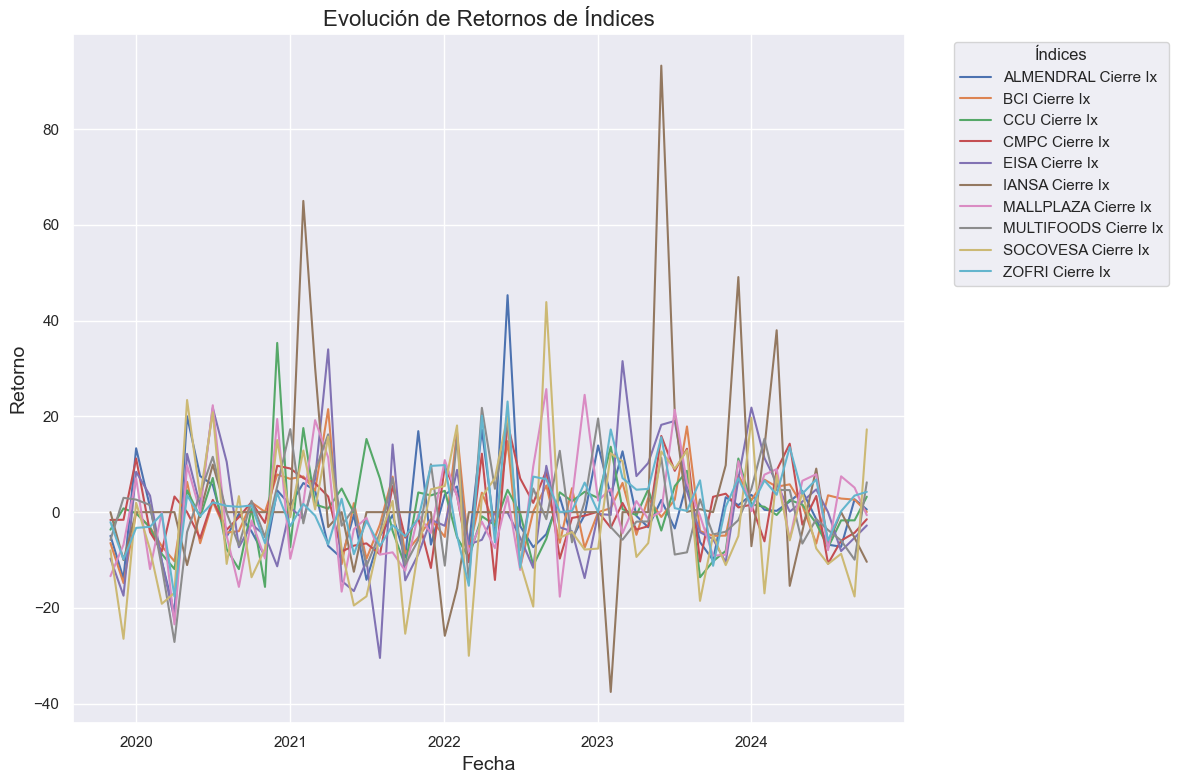

In [7]:
# Graficar la evolución de precios para todos los índices
plt.figure(figsize=(12, 8))

# Graficar todas las columnas (activos)
for column in df_r.columns:
    plt.plot(df_r.index, df_r[column], label=column)

# Añadir título y etiquetas
plt.title('Evolución de Retornos de Índices', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Retorno', fontsize=14)
plt.grid(True)
plt.legend(title='Índices', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

## Calcular la media y la matriz de varianza-covarianza

Con los datos de series temporales de las acciones disponibles, utilizamos las funciones mean y cov de Pandas para calcular los rendimientos promedio y su matriz de varianza-covarianza.

In [9]:
mu = df_r.mean()
sigma = df_r.cov()

In [10]:
mu

ALMENDRAL Cierre Ix     0.333605
BCI Cierre Ix           0.347824
CCU Cierre Ix           0.138095
CMPC Cierre Ix          0.546232
EISA Cierre Ix          0.035300
IANSA Cierre Ix         2.907216
MALLPLAZA Cierre Ix     0.401085
MULTIFOODS Cierre Ix    0.540851
SOCOVESA Cierre Ix     -1.563377
ZOFRI Cierre Ix         1.241255
dtype: float64

In [11]:
sigma

,ALMENDRAL Cierre Ix,BCI Cierre Ix,CCU Cierre Ix,CMPC Cierre Ix,EISA Cierre Ix,IANSA Cierre Ix,MALLPLAZA Cierre Ix,MULTIFOODS Cierre Ix,SOCOVESA Cierre Ix,ZOFRI Cierre Ix
ALMENDRAL Cierre Ix,97.327416,32.661045,25.420862,34.728735,36.284468,6.446291,29.386958,43.066750,67.892489,41.924142
BCI Cierre Ix,32.661045,53.987432,15.914906,24.551071,49.265559,13.208411,34.373979,31.314243,61.435723,17.061760
CCU Cierre Ix,25.420862,15.914906,69.875133,12.027161,5.825413,13.368023,37.921119,10.728335,42.271224,19.655307
CMPC Cierre Ix,34.728735,24.551071,12.027161,55.816258,27.678614,40.670947,27.039811,17.304800,51.771806,21.329713
EISA Cierre Ix,36.284468,49.265559,5.825413,27.678614,147.840761,52.029173,51.771097,41.214195,97.323218,24.237562
IANSA Cierre Ix,6.446291,13.208411,13.368023,40.670947,52.029173,360.463106,30.849469,22.057256,26.520695,19.193614
MALLPLAZA Cierre Ix,29.386958,34.373979,37.921119,27.039811,51.771097,30.849469,115.895309,22.099541,71.747312,33.054325
MULTIFOODS Cierre Ix,43.066750,31.314243,10.728335,17.304800,41.214195,22.057256,22.099541,89.752731,45.930217,29.717660
SOCOVESA Cierre Ix,67.892489,61.435723,42.271224,51.771806,97.323218,26.520695,71.747312,45.930217,205.605399,43.645330
ZOFRI Cierre Ix,41.924142,17.061760,19.655307,21.329713,24.237562,19.193614,33.054325,29.717660,43.645330,60.754703


Para uso futuro, guardamos los datos como archivos pickle de Python.

In [12]:
mu.to_pickle("mu.pkl")
sigma.to_pickle("sigma.pkl")